# Investigate Misclassified Data Instances

## Import data and libraries

In [239]:
# Initial Model
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [240]:
ada_data = pd.read_csv("ada_tfidf.csv")
knn_data = pd.read_csv("tuned_knn_tfidf.csv")
lr_data = pd.read_csv("logistic_regression.csv")
bayes_data = pd.read_csv("naive_bayes_tfidf.csv")
forest_data = pd.read_csv("random_forest_tfidf.csv")

## Merge all data together

In [241]:
ada_data.shape

(3912, 11)

### Read in and process review data

In [242]:
# Join the datasets
merged_data = pd.merge(ada_data, knn_data, on=["title", "reviewer_name"], how='inner', suffixes=('_ada', '_knn'))
merged_data = pd.merge(merged_data, lr_data, on=["title", "reviewer_name"], how='inner', suffixes=('', '_lr'))
merged_data = pd.merge(merged_data, bayes_data, on=["title", "reviewer_name"], how='inner', suffixes=('_lr', '_bayes'))
merged_data = pd.merge(merged_data, forest_data, on=["title", "reviewer_name"], how='inner', suffixes=('_bayes', '_forest'))

# Display the merged data
print(merged_data)



                                                  title  \
0                                  The Great Transition   
1                                  The Great Transition   
2                                  The Great Transition   
3                                  The Great Transition   
4                                  The Great Transition   
...                                                 ...   
7360                        Remarkably Bright Creatures   
7361                        Remarkably Bright Creatures   
7362                        Remarkably Bright Creatures   
7363  The Myth of Normal: Trauma, Illness, and Heali...   
7364  The Myth of Normal: Trauma, Illness, and Heali...   

                                   reviewer_name num_reviews_ada  \
0                                        Justine           1,192   
1                                        Sanjida             428   
2                                        Jessica              93   
3                  

In [243]:
merged_data.head()

,title,reviewer_name,num_reviews_ada,num_followers_ada,star_rating_ada,review_text_ada,num_likes_ada,num_comments_ada,sentiment_ada,cleaned_text_ada,...,Predicted Label_bayes,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text,Predicted Label
0,The Great Transition,Justine,"1,192",327,3.0,"3.5 starsAn interesting story, if somewhat sop...",12,0.0,0,"starsan,interest,stori,somewhat,sophomor,style...",...,2,"1,192",327,3.0,"3.5 starsAn interesting story, if somewhat sop...",12,0.0,0,"starsan,interest,stori,somewhat,sophomor,style...",0
1,The Great Transition,Sanjida,428,38,2.0,This novel starts off intriguing and fresh. Ma...,9,0.0,0,"novel,start,intrigu,fresh,mayb,sucker,young,na...",...,1,428,38,2.0,This novel starts off intriguing and fresh. Ma...,9,0.0,0,"novel,start,intrigu,fresh,mayb,sucker,young,na...",1
2,The Great Transition,Jessica,93,NaN,5.0,I absolutely adored this book. Many thanks to ...,3,0.0,2,"absolut,ador,book,mani,thank,atria,book,netgal...",...,1,93,NaN,5.0,I absolutely adored this book. Many thanks to ...,3,0.0,2,"absolut,ador,book,mani,thank,atria,book,netgal...",0
3,The Great Transition,Robin Beard,350,2,4.0,The Great Transition is not a book I would typ...,2,0.0,1,"great,transit,book,would,typic,choos,dystopian...",...,2,350,2,4.0,The Great Transition is not a book I would typ...,2,0.0,1,"great,transit,book,would,typic,choos,dystopian...",2
4,The Great Transition,Claire Curtis,168,3,3.0,3.5Nice world building if a life in a climate ...,2,0.0,0,"nice,world,build,life,climat,chang,futur,fairl...",...,2,168,3,3.0,3.5Nice world building if a life in a climate ...,2,0.0,0,"nice,world,build,life,climat,chang,futur,fairl...",2


In [244]:
# Keep only the specified labels
df = merged_data[['title', 'reviewer_name', 'star_rating', 'review_text', 'cleaned_text', 'sentiment', 'Predicted Label_ada', 'Predicted Label_knn', 'Predicted Label_lr', 'Predicted Label_bayes', 'Predicted Label']].copy()

# Remove entries where sentiment is the same as any of the predicted labels
df = df[~((df['sentiment'] == df['Predicted Label_ada']) |
          (df['sentiment'] == df['Predicted Label_knn']) |
          (df['sentiment'] == df['Predicted Label_lr']) |
          (df['sentiment'] == df['Predicted Label_bayes']) |
          (df['sentiment'] == df['Predicted Label']))]
df.head()

,title,reviewer_name,star_rating,review_text,cleaned_text,sentiment,Predicted Label_ada,Predicted Label_knn,Predicted Label_lr,Predicted Label_bayes,Predicted Label
1,The Great Transition,Sanjida,2.0,This novel starts off intriguing and fresh. Ma...,"novel,start,intrigu,fresh,mayb,sucker,young,na...",0,1,1,1,1,1
2,The Great Transition,Jessica,5.0,I absolutely adored this book. Many thanks to ...,"absolut,ador,book,mani,thank,atria,book,netgal...",2,0,1,0,1,0
3,The Great Transition,Robin Beard,4.0,The Great Transition is not a book I would typ...,"great,transit,book,would,typic,choos,dystopian...",1,2,2,2,2,2
4,The Great Transition,Claire Curtis,3.0,3.5Nice world building if a life in a climate ...,"nice,world,build,life,climat,chang,futur,fairl...",0,2,2,2,2,2
5,Holly,Will Byrnes,4.0,"I had to write this book to write one scene, w...","write,book,write,one,scene,saw,clearli,mind,ho...",1,2,2,2,2,2


### Load and process book data

In [245]:
# read in book data
book_data = pd.read_csv('/Users/blankajarmoszko/PycharmProjects/thesis/data/book_data.csv')

In [246]:
book_data.head()

,title,author,description,series_details,genres,avg_rating,num_ratings,num_reviews,pages_format,publication_info
0,The Stolen Heir,['Holly Black'],A runaway queen. A reluctant prince. And a que...,Book 1 in the The Stolen Heir Duology series,"['Fantasy', 'Young Adult', 'Romance', 'Fae', '...",4.01,86158,15610,"356 pages, Hardcover","First published January 3, 2023"
1,The Great Transition,['Nick Fuller Googins'],For fans of Station Eleven and The Ministry fo...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023"
2,Holly,['Stephen King'],"Holly Gibney, one of Stephen King’s most compe...",Book 3 in the Holly Gibney series,"['Horror', 'Fiction', 'Thriller', 'Mystery', '...",4.16,76777,9223,"449 pages, Hardcover","First published September 5, 2023"
3,How to Sell a Haunted House,['Grady Hendrix'],Grady Hendrix takes on the haunted house in a ...,NaN,"['Horror', 'Fiction', 'Thriller', 'Paranormal'...",3.70,90476,16090,"419 pages, Hardcover","First published January 17, 2023"
4,A House with Good Bones,['T. Kingfisher'],A haunting Southern Gothic from an award-winni...,NaN,"['Horror', 'Fantasy', 'Fiction', 'Gothic', 'My...",3.70,29319,5384,"247 pages, Hardcover","First published March 28, 2023"


In [247]:
# Remove duplicate title entries from book_data
review_data_unique = df.drop_duplicates(subset='review_text')


In [248]:
# Remove duplicate title entries from book_data
book_data_unique = book_data.drop_duplicates(subset='title')

# Get a list of all unique titles from book_data
unique_titles = book_data_unique['title'].value_counts().reset_index()
unique_titles.columns = ['title', 'count']

# Print the list of unique titles with counts
# print(unique_titles)




In [249]:
# Joining book_data and df on the 'title' column using left join
final_df = pd.merge(review_data_unique, book_data_unique, on="title", how='left')


In [250]:
final_df.shape

(683, 20)

## EDA misclassified data

### Genres

In [252]:
import ast
# Convert string representation of lists to actual lists of strings
final_df['list_genres'] = final_df['genres'].apply(ast.literal_eval)

# Add a new column that contains the first entry of a list in the 'list_column'
final_df['first_genre'] = final_df['list_genres'].apply(lambda x: x[0])
# Add a new column that contains the first entry of a list in the 'list_column'
final_df['second_genre'] = final_df['list_genres'].apply(lambda x: x[1])

final_df.head()


,title,reviewer_name,star_rating,review_text,cleaned_text,sentiment,Predicted Label_ada,Predicted Label_knn,Predicted Label_lr,Predicted Label_bayes,...,series_details,genres,avg_rating,num_ratings,num_reviews,pages_format,publication_info,list_genres,first_genre,second_genre
0,The Great Transition,Sanjida,2.0,This novel starts off intriguing and fresh. Ma...,"novel,start,intrigu,fresh,mayb,sucker,young,na...",0,1,1,1,1,...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction
1,The Great Transition,Jessica,5.0,I absolutely adored this book. Many thanks to ...,"absolut,ador,book,mani,thank,atria,book,netgal...",2,0,1,0,1,...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction
2,The Great Transition,Robin Beard,4.0,The Great Transition is not a book I would typ...,"great,transit,book,would,typic,choos,dystopian...",1,2,2,2,2,...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction
3,The Great Transition,Claire Curtis,3.0,3.5Nice world building if a life in a climate ...,"nice,world,build,life,climat,chang,futur,fairl...",0,2,2,2,2,...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction
4,Holly,Will Byrnes,4.0,"I had to write this book to write one scene, w...","write,book,write,one,scene,saw,clearli,mind,ho...",1,2,2,2,2,...,Book 3 in the Holly Gibney series,"['Horror', 'Fiction', 'Thriller', 'Mystery', '...",4.16,76777,9223,"449 pages, Hardcover","First published September 5, 2023","[Horror, Fiction, Thriller, Mystery, Crime, Au...",Horror,Fiction


In [253]:
# Get value counts for first genres
unique_genres = final_df['first_genre'].value_counts().reset_index()
unique_genres.columns = ['genre', 'count']

# Print the list of unique genres with counts
unique_genres

,genre,count
0,Fantasy,133
1,Nonfiction,109
2,Fiction,93
3,Romance,65
4,Historical Fiction,53
5,Horror,51
6,Science Fiction,35
7,Memoir,29
8,Thriller,27
9,Mystery,25


In [254]:
# Get value counts for first genres
unique_genres_two = final_df['second_genre'].value_counts().reset_index()
unique_genres_two.columns = ['second_genre', 'count']

# Print the list of unique genres with counts
unique_genres_two

,second_genre,count
0,Fiction,138
1,Romance,73
2,Nonfiction,59
3,Young Adult,51
4,Mystery,45
5,Contemporary,38
6,Science Fiction,30
7,Memoir,30
8,History,29
9,Fantasy,25


### Review Lengths

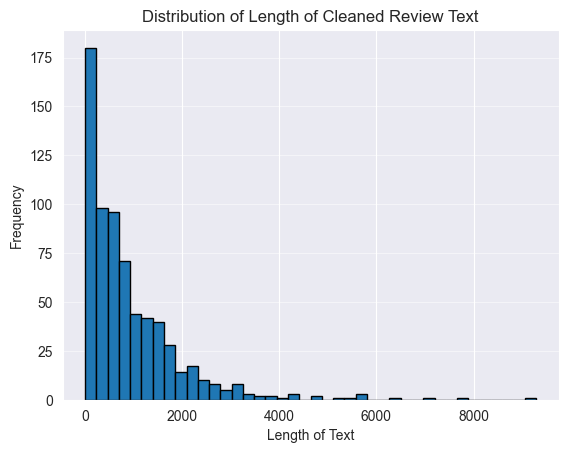

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the length of each list in the 'list_column'
list_lengths = final_df['cleaned_text'].apply(len)

# Plot the distribution of list lengths
plt.hist(list_lengths, bins=40,edgecolor='black')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Cleaned Review Text')
plt.grid(axis='y', alpha=0.5)
plt.show()


In [153]:
final_df.columns

Index(['title', 'reviewer_name', 'star_rating', 'review_text', 'cleaned_text',
       'sentiment', 'Predicted Label_ada', 'Predicted Label_knn',
       'Predicted Label_lr', 'Predicted Label_bayes', 'Predicted Label',
       'author', 'description', 'series_details', 'genres', 'avg_rating',
       'num_ratings', 'num_reviews', 'pages_format', 'publication_info',
       'list_genres', 'first_genre'],
      dtype='object')

### Look at reviews missclassied by all models

In [256]:
# Select the predicted label columns
predicted_label_columns = ['Predicted Label_ada', 'Predicted Label_knn', 'Predicted Label_lr', 'Predicted Label_bayes', 'Predicted Label']

# Filter reviews with the same predicted label
same_predicted_label_reviews = final_df[final_df[predicted_label_columns].nunique(axis=1) == 1]

# Print the filtered reviews
print(same_predicted_label_reviews)



                                                 title  \
0                                 The Great Transition   
2                                 The Great Transition   
3                                 The Great Transition   
4                                                Holly   
6                          How to Sell a Haunted House   
..                                                 ...   
671                                  Ordinary Monsters   
672                                  Ordinary Monsters   
674         Madly, Deeply: The Diaries of Alan Rickman   
680                        Remarkably Bright Creatures   
682  The Myth of Normal: Trauma, Illness, and Heali...   

                            reviewer_name  star_rating  \
0                                 Sanjida          2.0   
2                             Robin Beard          4.0   
3                           Claire Curtis          3.0   
4                             Will Byrnes          4.0   
6            

In [257]:
same_predicted_label_reviews.head()

,title,reviewer_name,star_rating,review_text,cleaned_text,sentiment,Predicted Label_ada,Predicted Label_knn,Predicted Label_lr,Predicted Label_bayes,...,series_details,genres,avg_rating,num_ratings,num_reviews,pages_format,publication_info,list_genres,first_genre,second_genre
0,The Great Transition,Sanjida,2.0,This novel starts off intriguing and fresh. Ma...,"novel,start,intrigu,fresh,mayb,sucker,young,na...",0,1,1,1,1,...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction
2,The Great Transition,Robin Beard,4.0,The Great Transition is not a book I would typ...,"great,transit,book,would,typic,choos,dystopian...",1,2,2,2,2,...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction
3,The Great Transition,Claire Curtis,3.0,3.5Nice world building if a life in a climate ...,"nice,world,build,life,climat,chang,futur,fairl...",0,2,2,2,2,...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction
4,Holly,Will Byrnes,4.0,"I had to write this book to write one scene, w...","write,book,write,one,scene,saw,clearli,mind,ho...",1,2,2,2,2,...,Book 3 in the Holly Gibney series,"['Horror', 'Fiction', 'Thriller', 'Mystery', '...",4.16,76777,9223,"449 pages, Hardcover","First published September 5, 2023","[Horror, Fiction, Thriller, Mystery, Crime, Au...",Horror,Fiction
6,How to Sell a Haunted House,HorrorBabe911,1.0,I really pushed my self thru this book to comp...,"realli,push,self,thru,book,complet,read,plain,...",0,2,2,2,2,...,NaN,"['Horror', 'Fiction', 'Thriller', 'Paranormal'...",3.70,90476,16090,"419 pages, Hardcover","First published January 17, 2023","[Horror, Fiction, Thriller, Paranormal, Audiob...",Horror,Fiction


In [232]:
# Get a list of all unique titles from book_data
unique_titles_uni = same_predicted_label_reviews['title'].value_counts().reset_index()
unique_titles_uni.columns = ['title', 'count']

# Print the list of unique titles with counts
unique_titles_uni

,title,count
0,Spare,7
1,Chain-Gang All-Stars,5
2,The Wishing Game,5
3,Upgrade,5
4,Surely You Can't Be Serious: The True Story of...,5
...,...,...
245,Unruly: A History of England's Kings and Queens,1
246,The World Record Book of Racist Stories,1
247,"Congratulations, the Best is Over!",1
248,"Unreliable Narrator: Me, Myself, and Impostor ...",1


In [260]:
same_predicted_label_reviews[same_predicted_label_reviews.title=="Surely You Can't Be Serious: The True Story of Airplane!"]

,title,reviewer_name,star_rating,review_text,cleaned_text,sentiment,Predicted Label_ada,Predicted Label_knn,Predicted Label_lr,Predicted Label_bayes,...,series_details,genres,avg_rating,num_ratings,num_reviews,pages_format,publication_info,list_genres,first_genre,second_genre
252,Surely You Can't Be Serious: The True Story of...,Lupine Smile,3.0,"Just a series of interviews. Interesting, but ...","seri,interview,interest,drag,quit,bit,time",0,2,2,2,2,...,NaN,"['Nonfiction', 'Humor', 'Film', 'History', 'Me...",4.18,1402,290,"352 pages, Hardcover","First published October 3, 2023","[Nonfiction, Humor, Film, History, Memoir, Med...",Nonfiction,Humor
253,Surely You Can't Be Serious: The True Story of...,Erik,4.0,"4 stars, and yes I'm serious (just don't call ...","star,ye,im,seriou,dont,call,shirley,good,gladi...",1,0,0,0,0,...,NaN,"['Nonfiction', 'Humor', 'Film', 'History', 'Me...",4.18,1402,290,"352 pages, Hardcover","First published October 3, 2023","[Nonfiction, Humor, Film, History, Memoir, Med...",Nonfiction,Humor
254,Surely You Can't Be Serious: The True Story of...,NaN,4.0,I received an advance copy via NetGalley.If yo...,"receiv,advanc,copi,via,netgalleyif,love,movi,a...",1,0,0,0,0,...,NaN,"['Nonfiction', 'Humor', 'Film', 'History', 'Me...",4.18,1402,290,"352 pages, Hardcover","First published October 3, 2023","[Nonfiction, Humor, Film, History, Memoir, Med...",Nonfiction,Humor
255,Surely You Can't Be Serious: The True Story of...,Michael Anderson,2.0,I was 14 when Airplane! hit theaters in summer...,"airplan,hit,theater,summer,lack,perspect,know,...",0,2,2,2,2,...,NaN,"['Nonfiction', 'Humor', 'Film', 'History', 'Me...",4.18,1402,290,"352 pages, Hardcover","First published October 3, 2023","[Nonfiction, Humor, Film, History, Memoir, Med...",Nonfiction,Humor
256,Surely You Can't Be Serious: The True Story of...,Kyle L,4.0,Enjoyable read for fans of this movie though i...,"enjoy,read,fan,movi,though,spend,much,time,ken...",1,2,2,2,2,...,NaN,"['Nonfiction', 'Humor', 'Film', 'History', 'Me...",4.18,1402,290,"352 pages, Hardcover","First published October 3, 2023","[Nonfiction, Humor, Film, History, Memoir, Med...",Nonfiction,Humor


### Genres

In [261]:
# look at the most often genres 
# Get value counts for first genres
unique_genres = same_predicted_label_reviews['first_genre'].value_counts().reset_index()
unique_genres.columns = ['genre', 'count']

# Print the list of unique genres with counts
unique_genres

,genre,count
0,Fantasy,107
1,Nonfiction,79
2,Fiction,55
3,Romance,46
4,Historical Fiction,35
5,Horror,33
6,Science Fiction,24
7,Memoir,22
8,Mystery,19
9,History,17


### true vs predicted sentiment distribution

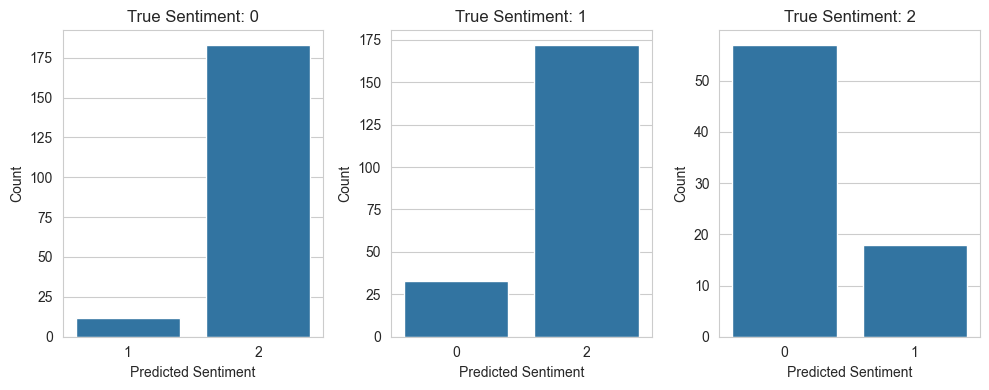

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame
data = same_predicted_label_reviews[['sentiment','Predicted Label']].copy()
final_df = pd.DataFrame(data)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Plot for each sentiment
for idx, (sentiment, group) in enumerate(final_df.groupby('sentiment')):
    ax = axes[idx]
    ax.set_title(f'True Sentiment: {sentiment}')
    sns.countplot(data=group, x='Predicted Label', ax=ax)
    ax.set_xlabel('Predicted Sentiment')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()




In [269]:
final_df.head()

,sentiment,Predicted Label
0,0,1
2,1,2
3,0,2
4,1,2
6,0,2


#### Investigate few misclassified reviews

In [175]:
for i in same_predicted_label_reviews.review_text:
    print("Review: ")
    print(i)
    print("       ")

Review: 
This novel starts off intriguing and fresh. Maybe I was a sucker for a young narrator and old school pop music references. And then. I got really annoyed by the writing. The sentences. Short and fragmented. For no reason. But I slogged. Slogged through it.I thought I would find the flashbacks to The Transition years interesting, but they became tedious and repetitive, and I began to dread them. The "now" sections are faster paced, but become absurd eventually, a thriller plot that isn't well thought out. The author is trying to have some deep thoughts about justice versus peace, but it's obvious where he stands and it ends up being polemical and alienating to those who don't share his views. Maybe there's also too much tell not show, like of course the reader will agree with the author on why the bad guys are bad. No nuance needed. But if a post scarcity, worker-owned zero carbon society isn't good enough, then maybe that's a you problem, Kristina. (Team Larch!)Recommended to 

In [176]:
same_predicted_label_reviews.head(50)

,title,reviewer_name,star_rating,review_text,cleaned_text,sentiment,Predicted Label_ada,Predicted Label_knn,Predicted Label_lr,Predicted Label_bayes,...,description,series_details,genres,avg_rating,num_ratings,num_reviews,pages_format,publication_info,list_genres,first_genre
0,The Great Transition,Sanjida,2.0,This novel starts off intriguing and fresh. Ma...,"novel,start,intrigu,fresh,mayb,sucker,young,na...",0,1,1,1,1,...,For fans of Station Eleven and The Ministry fo...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction
2,The Great Transition,Robin Beard,4.0,The Great Transition is not a book I would typ...,"great,transit,book,would,typic,choos,dystopian...",1,2,2,2,2,...,For fans of Station Eleven and The Ministry fo...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction
3,The Great Transition,Claire Curtis,3.0,3.5Nice world building if a life in a climate ...,"nice,world,build,life,climat,chang,futur,fairl...",0,2,2,2,2,...,For fans of Station Eleven and The Ministry fo...,NaN,"['Fiction', 'Science Fiction', 'Dystopia', 'Cl...",3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction
4,Holly,Will Byrnes,4.0,"I had to write this book to write one scene, w...","write,book,write,one,scene,saw,clearli,mind,ho...",1,2,2,2,2,...,"Holly Gibney, one of Stephen King’s most compe...",Book 3 in the Holly Gibney series,"['Horror', 'Fiction', 'Thriller', 'Mystery', '...",4.16,76777,9223,"449 pages, Hardcover","First published September 5, 2023","[Horror, Fiction, Thriller, Mystery, Crime, Au...",Horror
6,How to Sell a Haunted House,HorrorBabe911,1.0,I really pushed my self thru this book to comp...,"realli,push,self,thru,book,complet,read,plain,...",0,2,2,2,2,...,Grady Hendrix takes on the haunted house in a ...,NaN,"['Horror', 'Fiction', 'Thriller', 'Paranormal'...",3.70,90476,16090,"419 pages, Hardcover","First published January 17, 2023","[Horror, Fiction, Thriller, Paranormal, Audiob...",Horror
7,How to Sell a Haunted House,Lex Kent,4.0,3.50 Stars. That was quite the ride. I was sup...,"star,quit,ride,super,excit,book,youv,follow,re...",1,2,2,2,2,...,Grady Hendrix takes on the haunted house in a ...,NaN,"['Horror', 'Fiction', 'Thriller', 'Paranormal'...",3.70,90476,16090,"419 pages, Hardcover","First published January 17, 2023","[Horror, Fiction, Thriller, Paranormal, Audiob...",Horror
10,A House with Good Bones,Beverly,4.0,"Another good book by T. Kingfisher, A House wi...","anoth,good,book,kingfish,hous,good,bone,relat,...",1,2,2,2,2,...,A haunting Southern Gothic from an award-winni...,NaN,"['Horror', 'Fantasy', 'Fiction', 'Gothic', 'My...",3.70,29319,5384,"247 pages, Hardcover","First published March 28, 2023","[Horror, Fantasy, Fiction, Gothic, Mystery, Pa...",Horror
11,A House with Good Bones,Sheyla ✎,3.0,I liked it well enough.Sam Montgomery is an ar...,"like,well,enoughsam,montgomeri,archaeoentomolo...",0,2,2,2,2,...,A haunting Southern Gothic from an award-winni...,NaN,"['Horror', 'Fantasy', 'Fiction', 'Gothic', 'My...",3.70,29319,5384,"247 pages, Hardcover","First published March 28, 2023","[Horror, Fantasy, Fiction, Gothic, Mystery, Pa...",Horror
13,My Darling Girl,Jayne,4.0,'Tis the season for horror! ghost skull sku...,"ti,season,horror,ghost,skull,skull_and_crossbo...",1,2,2,2,2,...,A spine-tingling psychological thriller about ...,NaN,"['Horror', 'Thriller', 'Fiction', 'Mystery', '...",3.78,10620,1851,"320 pages, Hardcover","First published October 3, 2023","[Horror, Thriller, Fiction, Mystery, Mystery T...",Horror
14,The September House,Catherine (alternativelytitledbooks)-very behi...,3.0,"**Many thanks to Shelf Awareness, Berkley, and...","mani,thank,shelf,awar,berkley,cariss

In [ ]:
# example missclassified review idx 6

In [272]:
from textblob import TextBlob
same_predicted_label_reviews['polarity']=same_predicted_label_reviews['review_text'].apply(lambda x:TextBlob(x).sentiment.polarity)
same_predicted_label_reviews['subjectivity']=same_predicted_label_reviews['review_text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [273]:
same_predicted_label_reviews.head()

,title,reviewer_name,star_rating,review_text,cleaned_text,sentiment,Predicted Label_ada,Predicted Label_knn,Predicted Label_lr,Predicted Label_bayes,...,avg_rating,num_ratings,num_reviews,pages_format,publication_info,list_genres,first_genre,second_genre,polarity,subjectivity
0,The Great Transition,Sanjida,2.0,This novel starts off intriguing and fresh. Ma...,"novel,start,intrigu,fresh,mayb,sucker,young,na...",0,1,1,1,1,...,3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction,-0.059524,0.508730
2,The Great Transition,Robin Beard,4.0,The Great Transition is not a book I would typ...,"great,transit,book,would,typic,choos,dystopian...",1,2,2,2,2,...,3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction,0.261778,0.579889
3,The Great Transition,Claire Curtis,3.0,3.5Nice world building if a life in a climate ...,"nice,world,build,life,climat,chang,futur,fairl...",0,2,2,2,2,...,3.83,1730,396,"352 pages, Hardcover","First published August 15, 2023","[Fiction, Science Fiction, Dystopia, Climate C...",Fiction,Science Fiction,-0.022917,0.436458
4,Holly,Will Byrnes,4.0,"I had to write this book to write one scene, w...","write,book,write,one,scene,saw,clearli,mind,ho...",1,2,2,2,2,...,4.16,76777,9223,"449 pages, Hardcover","First published September 5, 2023","[Horror, Fiction, Thriller, Mystery, Crime, Au...",Horror,Fiction,0.073717,0.517839
6,How to Sell a Haunted House,HorrorBabe911,1.0,I really pushed my self thru this book to comp...,"realli,push,self,thru,book,complet,read,plain,...",0,2,2,2,2,...,3.70,90476,16090,"419 pages, Hardcover","First published January 17, 2023","[Horror, Fiction, Thriller, Paranormal, Audiob...",Horror,Fiction,-0.102857,0.491429


#### Visualize distributions

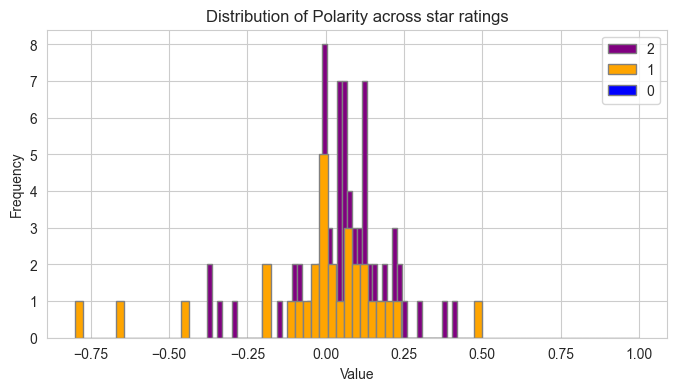

In [274]:
# Get group names and define colors
group_name = sorted(same_predicted_label_reviews['sentiment'].unique(), reverse= True)
colors = ['purple', 'orange','blue']

# Plot the histograms
for i, group in enumerate(group_name):
    ax = same_predicted_label_reviews[same_predicted_label_reviews['star_rating']==group]['polarity'].hist(figsize=(8, 4),
                                        edgecolor='gray',
                                        bins=50,
                                        color=colors[i]
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Polarity across star ratings')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

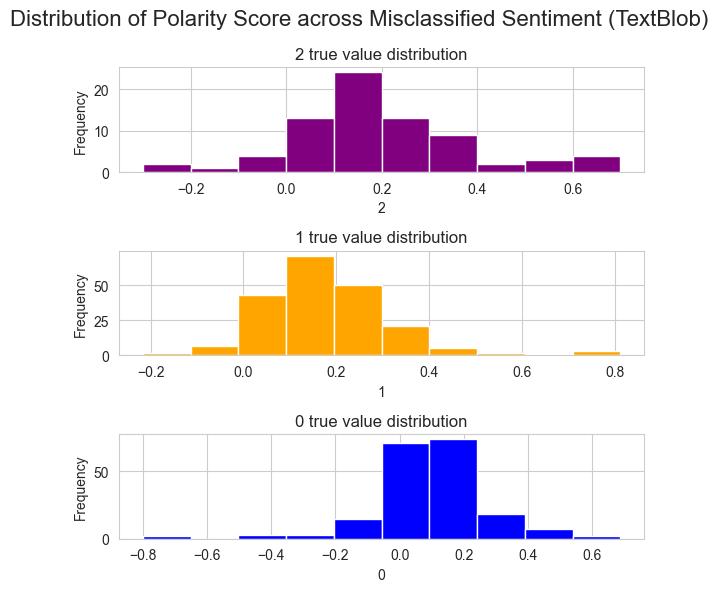

In [281]:
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, group in enumerate(group_name):

    # Add the histogram
    ax =same_predicted_label_reviews[same_predicted_label_reviews['sentiment']==group]['polarity'].hist(ax=axes[i],
                    edgecolor='white', # Color of the border
                    color=colors[i] # Color of the bins
                   )

    # Add title and axis label
    axes[i].set_title(f'{group} true value distribution')
    axes[i].set_xlabel(group)
    axes[i].set_ylabel('Frequency')

# Add a general title to the plot
fig.suptitle('Distribution of Polarity Score across Misclassified Sentiment (TextBlob)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

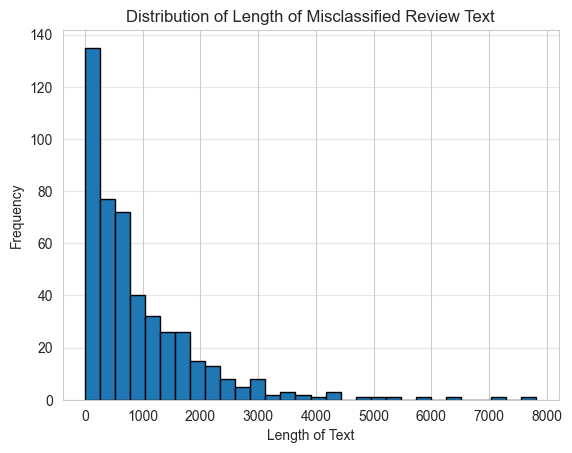

In [283]:
# Get the length of each list in the 'list_column'
list_lengths = same_predicted_label_reviews['cleaned_text'].apply(len)

# Plot the distribution of list lengths
plt.hist(list_lengths, bins=30,edgecolor='black')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Misclassified Review Text')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [285]:
same_predicted_label_reviews[(same_predicted_label_reviews['Predicted Label'] == 0) & (same_predicted_label_reviews['sentiment'] == 2)]

,title,reviewer_name,star_rating,review_text,cleaned_text,sentiment,Predicted Label_ada,Predicted Label_knn,Predicted Label_lr,Predicted Label_bayes,...,avg_rating,num_ratings,num_reviews,pages_format,publication_info,list_genres,first_genre,second_genre,polarity,subjectivity
29,The Reformatory,inciminci,5.0,It is wonderful to see Tananarive Due quickly ...,"wonder,see,tananar,due,quickli,becom,household...",2,0,0,0,0,...,4.52,6507,1374,"576 pages, Hardcover","First published October 31, 2023","[Horror, Historical Fiction, Fiction, Historic...",Horror,Historical Fiction,1.622768e-01,0.641964
45,Divine Rivals,Rebecca (life's chaotic catching up),5.0,Re-read bc it's almost time!!! loudly_crying_...,"reread,bc,almost,time,loudly_crying_fac,blue_h...",2,0,0,0,0,...,4.26,293374,52635,"357 pages, Hardcover","First published April 4, 2023","[Fantasy, Romance, Young Adult, Fiction, Fanta...",Fantasy,Romance,1.755289e-01,0.514172
58,Foxglove,Kat | katreadsit,5.0,You already know that I loved this one smirki...,"alreadi,know,love,one,smirking_fac,relieved_fa...",2,0,0,0,0,...,4.20,21228,3836,"464 pages, Hardcover","First published August 22, 2023","[Fantasy, Romance, Young Adult, Gothic, Myster...",Fantasy,Romance,7.000000e-01,0.800000
61,These Infinite Threads,ash ౨ৎ,5.0,4.5? this is suchhh a guilty pleasure rating b...,"suchhh,guilti,pleasur,rate,miss,tahereh,mafi,k...",2,0,0,0,0,...,4.13,21689,4194,"416 pages, Hardcover","First published February 7, 2023","[Fantasy, Young Adult, Romance, Young Adult Fa...",Fantasy,Young Adult,-1.133333e-01,0.546667
70,Blood Debts,Toya (thereadingchemist),5.0,Quick thoughts: Wow. Absolutely fucking brilli...,"quick,thought,wow,absolut,fuck,brilliantfor,ev...",2,0,0,0,0,...,3.79,2651,974,"416 pages, Hardcover","First published April 4, 2023","[Fantasy, Young Adult, LGBT, Mystery, Queer, Y...",Fantasy,Young Adult,1.762452e-01,0.631801
94,Highly Suspicious and Unfairly Cute,mina reads™️,5.0,talia hibbert is truly a genius and Brad Graem...,"talia,hibbert,truli,geniu,brad,graem,might,fav...",2,0,0,0,0,...,3.75,27130,6243,"336 pages, ebook","First published January 3, 2023","[Romance, Young Adult, Contemporary, Fiction, ...",Romance,Young Adult,2.357305e-01,0.555782
126,One Summer in Savannah,Chris C - A Midlife Wife,5.0,Oh my god! Amazing and brilliant! Brave and co...,"oh,god,amaz,brilliant,brave,compel,end,collis,...",2,0,0,0,0,...,4.17,7019,998,"464 pages, Hardcover","First published July 4, 2023","[Fiction, Romance, Contemporary, Literary Fict...",Fiction,Romance,3.906450e-01,0.744925
130,"The Art Thief: A True Story of Love, Crime, an...",Carolyn Walsh,5.0,My Recommendation This was an incredible true...,"recommend,incred,true,stori,prolif,brazen,art,...",2,0,0,0,0,...,4.01,20569,2691,"240 pages, Hardcover","First published June 22, 2023","[Nonfiction, Art, True Crime, History, Audiobo...",Nonfiction,Art,9.110269e-02,0.493136
140,Outlive: The Science and Art of Longevity,Camelia Rose,5.0,"The best book on health, aging and longevity I...","best,book,health,age,longev,ive,read,far,uptod...",2,0,0,0,0,...,4.40,37150,3335,"496 pages, Hardcover","First published March 28, 2023","[Health, Nonfiction, Science, Self Help, Audio...",Health,Nonfiction,1.289129e-01,0.557999
146,Cobalt Red: How the Blood of the Congo Powers ...,A,5.0,This book shares a bleak story of cobalt minin...,"book,share,bleak,stori,cobalt,mine,congo,imagi...",2,0,0,0,0,...,4.39,5413,991,"288 pages, Hardcover","First published January 31, 2023","[Nonfiction, History, Africa, Politics, Econom...",Nonfiction,History,-7.373737e-02,0.609764


#### Look into common text characteristics

In [186]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/blankajarmoszko/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [202]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import pos_tag, FreqDist, ngrams, RegexpParser
from textblob import TextBlob
import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def analyze_review(review, sentiment, predicted):
    # Tokenization
    words = word_tokenize(review)

    # POS Tagging
    pos_tags = pos_tag(words)

    # Named Entity Recognition (NER)
    doc = nlp(review)
    named_entities = [(X.text, X.label_) for X in doc.ents]

    # N-grams Analysis
    bigrams = list(ngrams(words, 2))
    trigrams = list(ngrams(words, 3))

    # Sentiment Analysis
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(review)

    # TextBlob Sentiment Analysis
    tb_analysis = TextBlob(review)

    # Emoticons and Emoji Analysis
    emoticons = [word for word in words if any(char in word for char in [':)', ':('])]
    emojis = [word for word in words if word in [':)', ':(']]

    # Negations and Modifiers
    negations = ['not', 'never', 'no']
    negation_words = [word for word in words if word.lower() in negations]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Frequency Distribution
    fdist = FreqDist(filtered_words)

    # Lexicon Analysis
    positive_words = [word for word in filtered_words if sia.polarity_scores(word)['compound'] > 0]
    negative_words = [word for word in filtered_words if sia.polarity_scores(word)['compound'] < 0]
    neutral_words = [word for word in filtered_words if sia.polarity_scores(word)['compound'] == 0]

    return {
        "Sentiment": sentiment,
        "Predicted Label": predicted,
        "Review Length": len(words),
        "POS Tags": pos_tags,
        "Named Entities": named_entities,
        "Bigrams": bigrams,
        "Trigrams": trigrams,
        "Sentiment Score (VADER)": sentiment_score,
        "Sentiment Score (TextBlob)": tb_analysis.sentiment,
        "Emoticons": emoticons,
        "Emojis": emojis,
        "Negation Words": negation_words,
        "Positive Words": positive_words,
        "Negative Words": negative_words,
        "Neutral Words": neutral_words,
        "Word Frequency Distribution": fdist
    }



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/blankajarmoszko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blankajarmoszko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/blankajarmoszko/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [288]:
same_predicted_label_reviews.review_text[126]

'Oh my god! Amazing and brilliant! Brave and compelling! And that ending  collision  ~~~~~~~~~~~~~~~~~~~When I turned the final page, I sat and tried to absorb the feelings and emotions from this impactful and powerful story. Harris has taken a story that needed to be told and ripped my heart to shreds.Fair warning – you need to be open and willing to read about the aftermath of a sexual assault. Trust me when I say, I was nervous too, but this author takes a tragedy and creates a miracle. It is truly a stunning story.Harris has taken the raw and gritty and gifted us with heart, compassion, healing, forgiveness, and love. Set aside a quiet weekend and read this with tissues and an open mind. One Summer in Savannah and Harris is amazing and brilliant! Brave and compelling! And that ending is nothing short of bomb-tastic!This is the best read of 2023 so far! Harris has just put her name in lights!* copy received for review consideration* full review - https://amidlifewife.com/one-summer-

In [289]:
analysis = analyze_review(same_predicted_label_reviews.review_text[126], same_predicted_label_reviews.sentiment[126],same_predicted_label_reviews['Predicted Label'][126])
for key, value in analysis.items():
    print(f"{key}: {value}")

Sentiment: 2
Predicted Label: 0
Review Length: 196
POS Tags: [('Oh', 'UH'), ('my', 'PRP$'), ('god', 'NN'), ('!', '.'), ('Amazing', 'NNP'), ('and', 'CC'), ('brilliant', 'JJ'), ('!', '.'), ('Brave', 'NNP'), ('and', 'CC'), ('compelling', 'NN'), ('!', '.'), ('And', 'CC'), ('that', 'IN'), ('ending', 'VBG'), ('collision', 'NN'), ('~~~~~~~~~~~~~~~~~~~When', 'NN'), ('I', 'PRP'), ('turned', 'VBD'), ('the', 'DT'), ('final', 'JJ'), ('page', 'NN'), (',', ','), ('I', 'PRP'), ('sat', 'VBD'), ('and', 'CC'), ('tried', 'VBD'), ('to', 'TO'), ('absorb', 'VB'), ('the', 'DT'), ('feelings', 'NNS'), ('and', 'CC'), ('emotions', 'NNS'), ('from', 'IN'), ('this', 'DT'), ('impactful', 'JJ'), ('and', 'CC'), ('powerful', 'JJ'), ('story', 'NN'), ('.', '.'), ('Harris', 'NNP'), ('has', 'VBZ'), ('taken', 'VBN'), ('a', 'DT'), ('story', 'NN'), ('that', 'WDT'), ('needed', 'VBD'), ('to', 'TO'), ('be', 'VB'), ('told', 'VBN'), ('and', 'CC'), ('ripped', 'VBN'), ('my', 'PRP$'), ('heart', 'NN'), ('to', 'TO'), ('shreds.Fair', 'V

In [208]:
# foreign language reviews
same_predicted_label_reviews.iloc[12,:]

title                                                          Black Sheep
reviewer_name                                                      Summer 
star_rating                                                            5.0
review_text              When Vesper turned 18, she left her rural life...
cleaned_text             vesper,turn,left,rural,life,religi,famili,new,...
sentiment                                                                2
Predicted Label_ada                                                      1
Predicted Label_knn                                                      1
Predicted Label_lr                                                       1
Predicted Label_bayes                                                    1
Predicted Label                                                          1
author                                               ['Rachel   Harrison']
description              A cynical twentysomething must confront her un...
series_details           

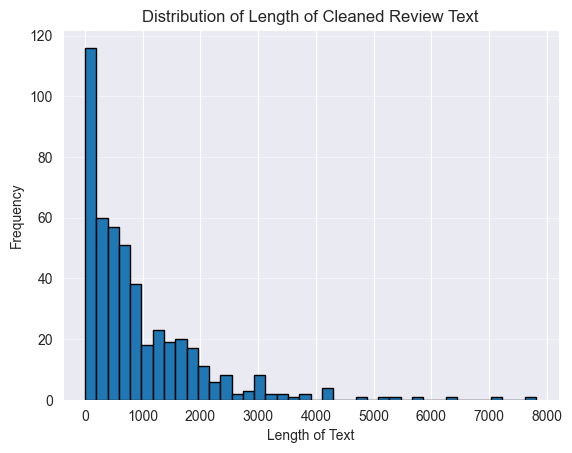

In [211]:
unique_genres
import pandas as pd
import matplotlib.pyplot as plt

# Get the length of each list in the 'list_column'
list_lengths_uni = same_predicted_label_reviews['cleaned_text'].apply(len)

# Plot the distribution of list lengths
plt.hist(list_lengths_uni, bins=40, edgecolor='black')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Cleaned Review Text')
plt.grid(axis='y', alpha=0.5)
plt.show()
